- Mengimport Beberapa Libraries Yang Dibutuhkan

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

- Menyimpan Data Ke Variabel Tertentu

In [260]:
titanic = sns.load_dataset("titanic")

- Melihat Data Dengan Default 5 Row Diawal

In [261]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Melihat Data Dengan Default 5 Row Diakhir

In [262]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


-  Melihat Info Pada Data

In [263]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- Melihat Deskripsi Data

In [264]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Melihat Siapa Saja Dan Berapa Banyak Yang Selamat Atau Tidak Pada Data

<Axes: xlabel='survived', ylabel='count'>

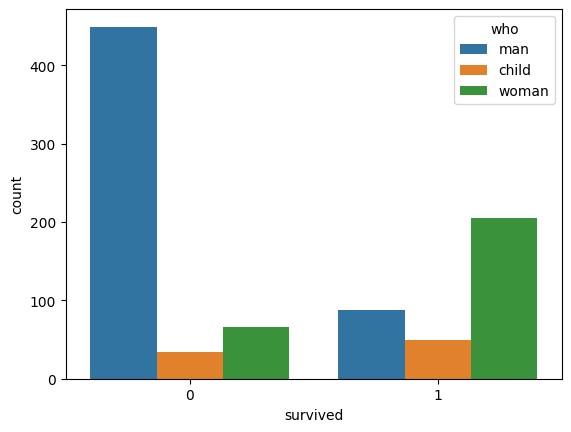

In [265]:
sns.countplot(data=titanic, x="survived", hue="who")

- Melihat Berapa Banyak Yang Selamat Atau Tidak Dan Asal Keberangkatan Dibawah Umur 20 Tahun Pada Data

<Axes: xlabel='survived', ylabel='count'>

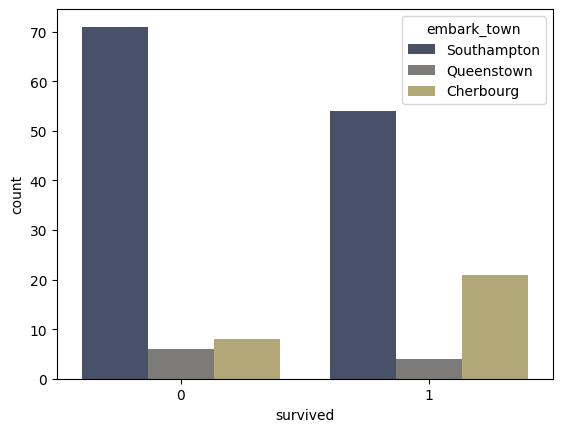

In [266]:
titanic_less_20 = titanic[titanic["age"] < 20]
sns.countplot(data=titanic_less_20, x="survived", hue="embark_town", palette="cividis")

- Melihat Umur Dan Jenis Kelamin Yang Selamat Atau Tidak Pada Data

<Axes: xlabel='sex', ylabel='age'>

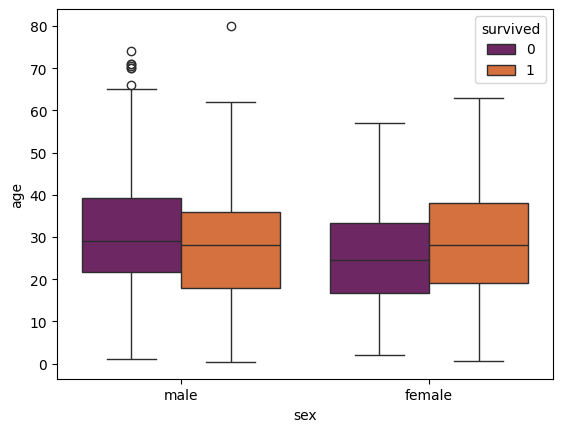

In [267]:
sns.boxplot(data=titanic, x="sex", y="age", hue="survived", palette="inferno")

- Percobaan Menggunakan Data Titanic Dalam Melatih Machine Learning

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Buat data baru dengan one-hot encoding
new_data = pd.get_dummies(titanic)

# 2. Drop missing values (sementara)
new_data = new_data.dropna()

# 3. Pisahkan fitur dan target
X = new_data.drop("survived", axis=1)
y = new_data["survived"]

# 4. Bagi data jadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Buat dan latih model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Evaluasi model
y_pred = model.predict(X_test)
print("\t\t\tAccuracy:", accuracy_score(y_test, y_pred), "\n\n")
print(classification_report(y_test, y_pred))

			Accuracy: 1.0 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



- Melihat Berapa Data Yang Sama Dengan Data Yang lain

In [269]:
sum(titanic.duplicated())

107

- Menghapus Data Yang Sama Dengan Per-Row Dan Di Cek Berapa Data Yang Sama Dengan Data Yang Lain

In [270]:
titanic = titanic.drop_duplicates()
sum(titanic.duplicated())

0

- Mengecek Data Yang Kosong Dengan Divisualisasikan (Warna Putih Berarti Itu Ada Data Yang Kosong)

<Axes: >

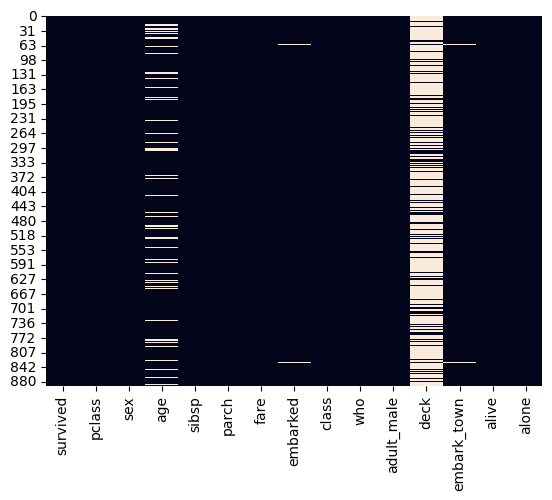

In [271]:
sns.heatmap(titanic.isnull(), cbar=False)

- Menghapus Data Yang Kosong Per-Column

In [272]:
titanic = titanic.dropna(axis=1)

- Melihat Data Akhir Dengan Default 5 Row

In [273]:
titanic.tail()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
885,0,3,female,0,5,29.125,Third,woman,False,no,False
887,1,1,female,0,0,30.000,First,woman,False,yes,True
888,0,3,female,1,2,23.450,Third,woman,False,no,False
889,1,1,male,0,0,30.000,First,man,True,yes,True
890,0,3,male,0,0,7.750,Third,man,True,no,True


- Membuat Data Baru Dan Menambahkannya Ke DataFrame 'titanic'

In [274]:
new_data = [1 if i == "First" else 2 if i == "Second" else 3 if i =="Third" else i for i in titanic["class"]]

titanic["class_number"] = new_data

- Melihat Data Akhir Dengan Default 5 Row

In [275]:
titanic.tail()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,class_number
885,0,3,female,0,5,29.125,Third,woman,False,no,False,3
887,1,1,female,0,0,30.000,First,woman,False,yes,True,1
888,0,3,female,1,2,23.450,Third,woman,False,no,False,3
889,1,1,male,0,0,30.000,First,man,True,yes,True,1
890,0,3,male,0,0,7.750,Third,man,True,no,True,3


- Melihat Jumlah Data Per-Row

In [276]:
len(titanic)

784

- Mengecek Apakah Data 'class_number' Sama Dengan 'pclass' Dan Dihitung Serta Menampilkannya Total Data Yang Sama

In [277]:
print(sum(titanic["pclass"] == titanic["class_number"]))

784


- Mengecek Berapa Value Data 'alone' Dan Divisualisasikan

<Axes: xlabel='alone'>

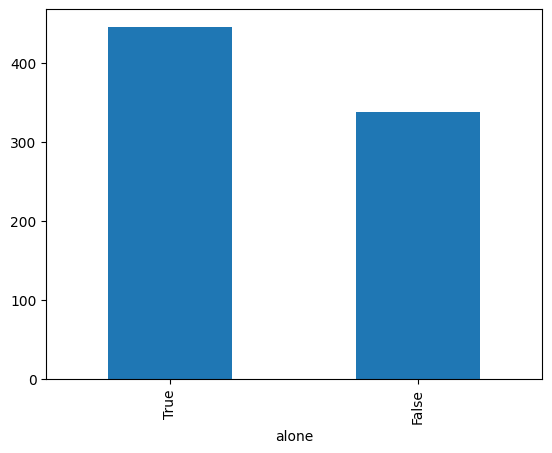

In [278]:
titanic["alone"].value_counts().plot(kind="bar")

- Mengecek Berapa Value Data 'who' Dan Divisualisasikan

<Axes: ylabel='count'>

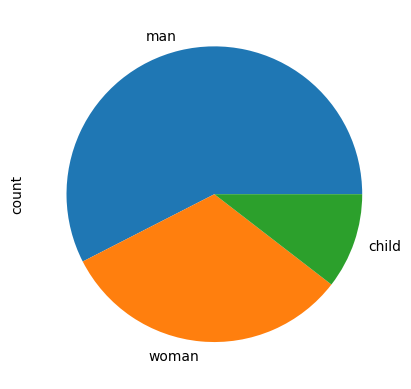

In [279]:
titanic["who"].value_counts().plot(kind="pie")

- Mengecek Apakah Ada Data Yang Kosong Dan Ditotalkan

In [280]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0
class,0
who,0
adult_male,0
alive,0


- Mengecek Kembali Data Yang Kosong Dengan Divisualisasikan

<Axes: >

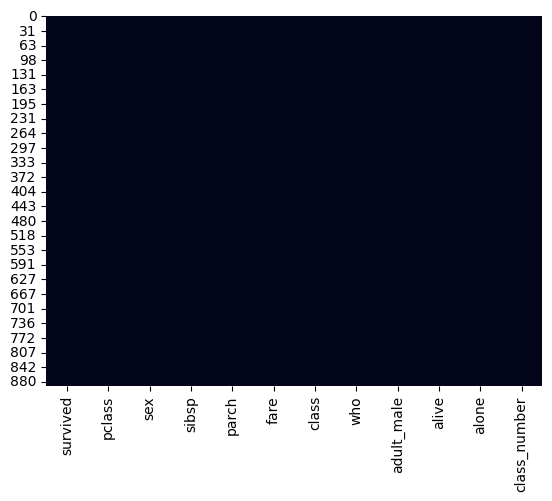

In [281]:
sns.heatmap(titanic.isnull(), cbar=False)

- Melihat Korelasi (kemiripan) Data Dengan Data Yang Lain Dan Divisualisasikan Menggunakan Warna

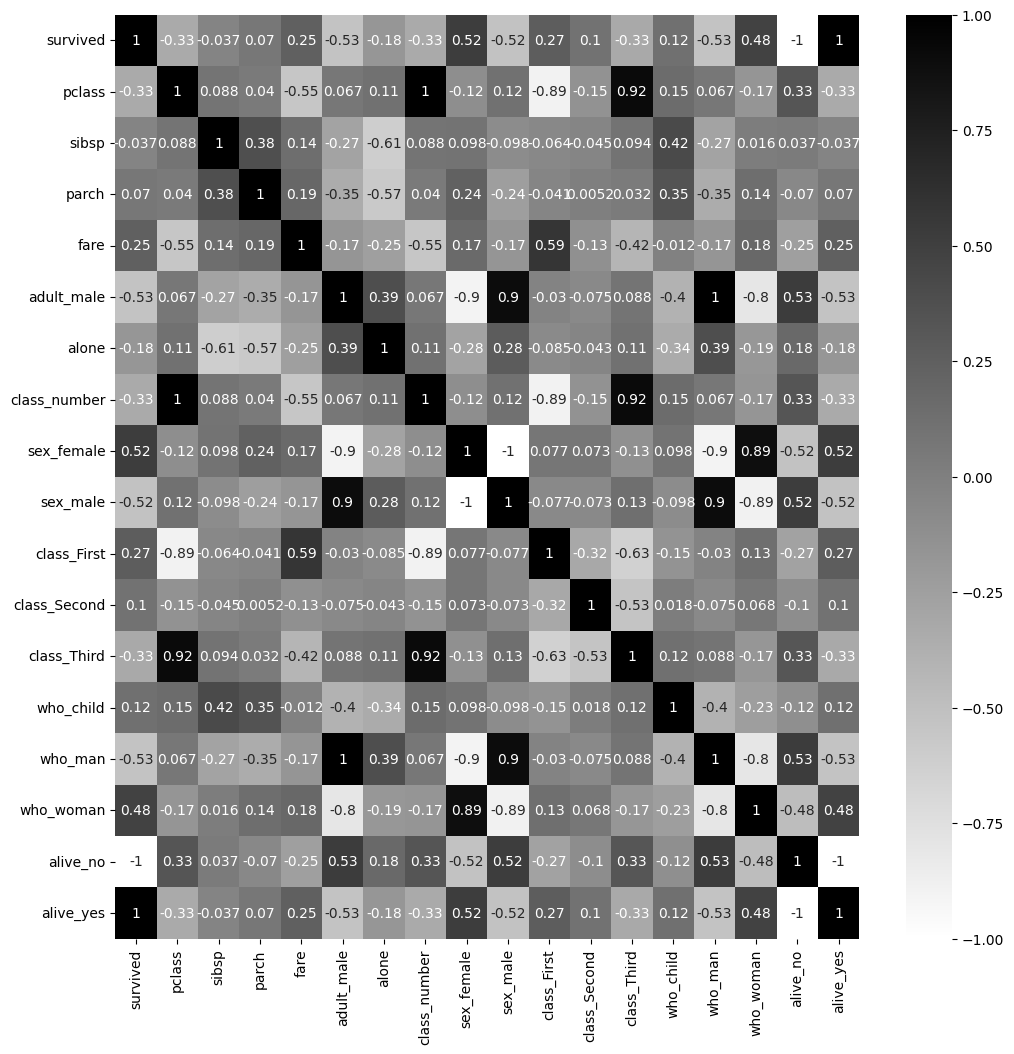

In [286]:
# sns.heatmap(titanic.drop(["sex", "who", "class", "alive"],axis=1).corr())
plt.figure(figsize=(12, 12))
sns.heatmap(pd.get_dummies(titanic).corr(), cmap="binary", annot=True)
plt.show()

- Melihat Korelasi (kemiripan) Data Dengan Data Yang Lain Dan Divisualisasikan Menggunakan Plot

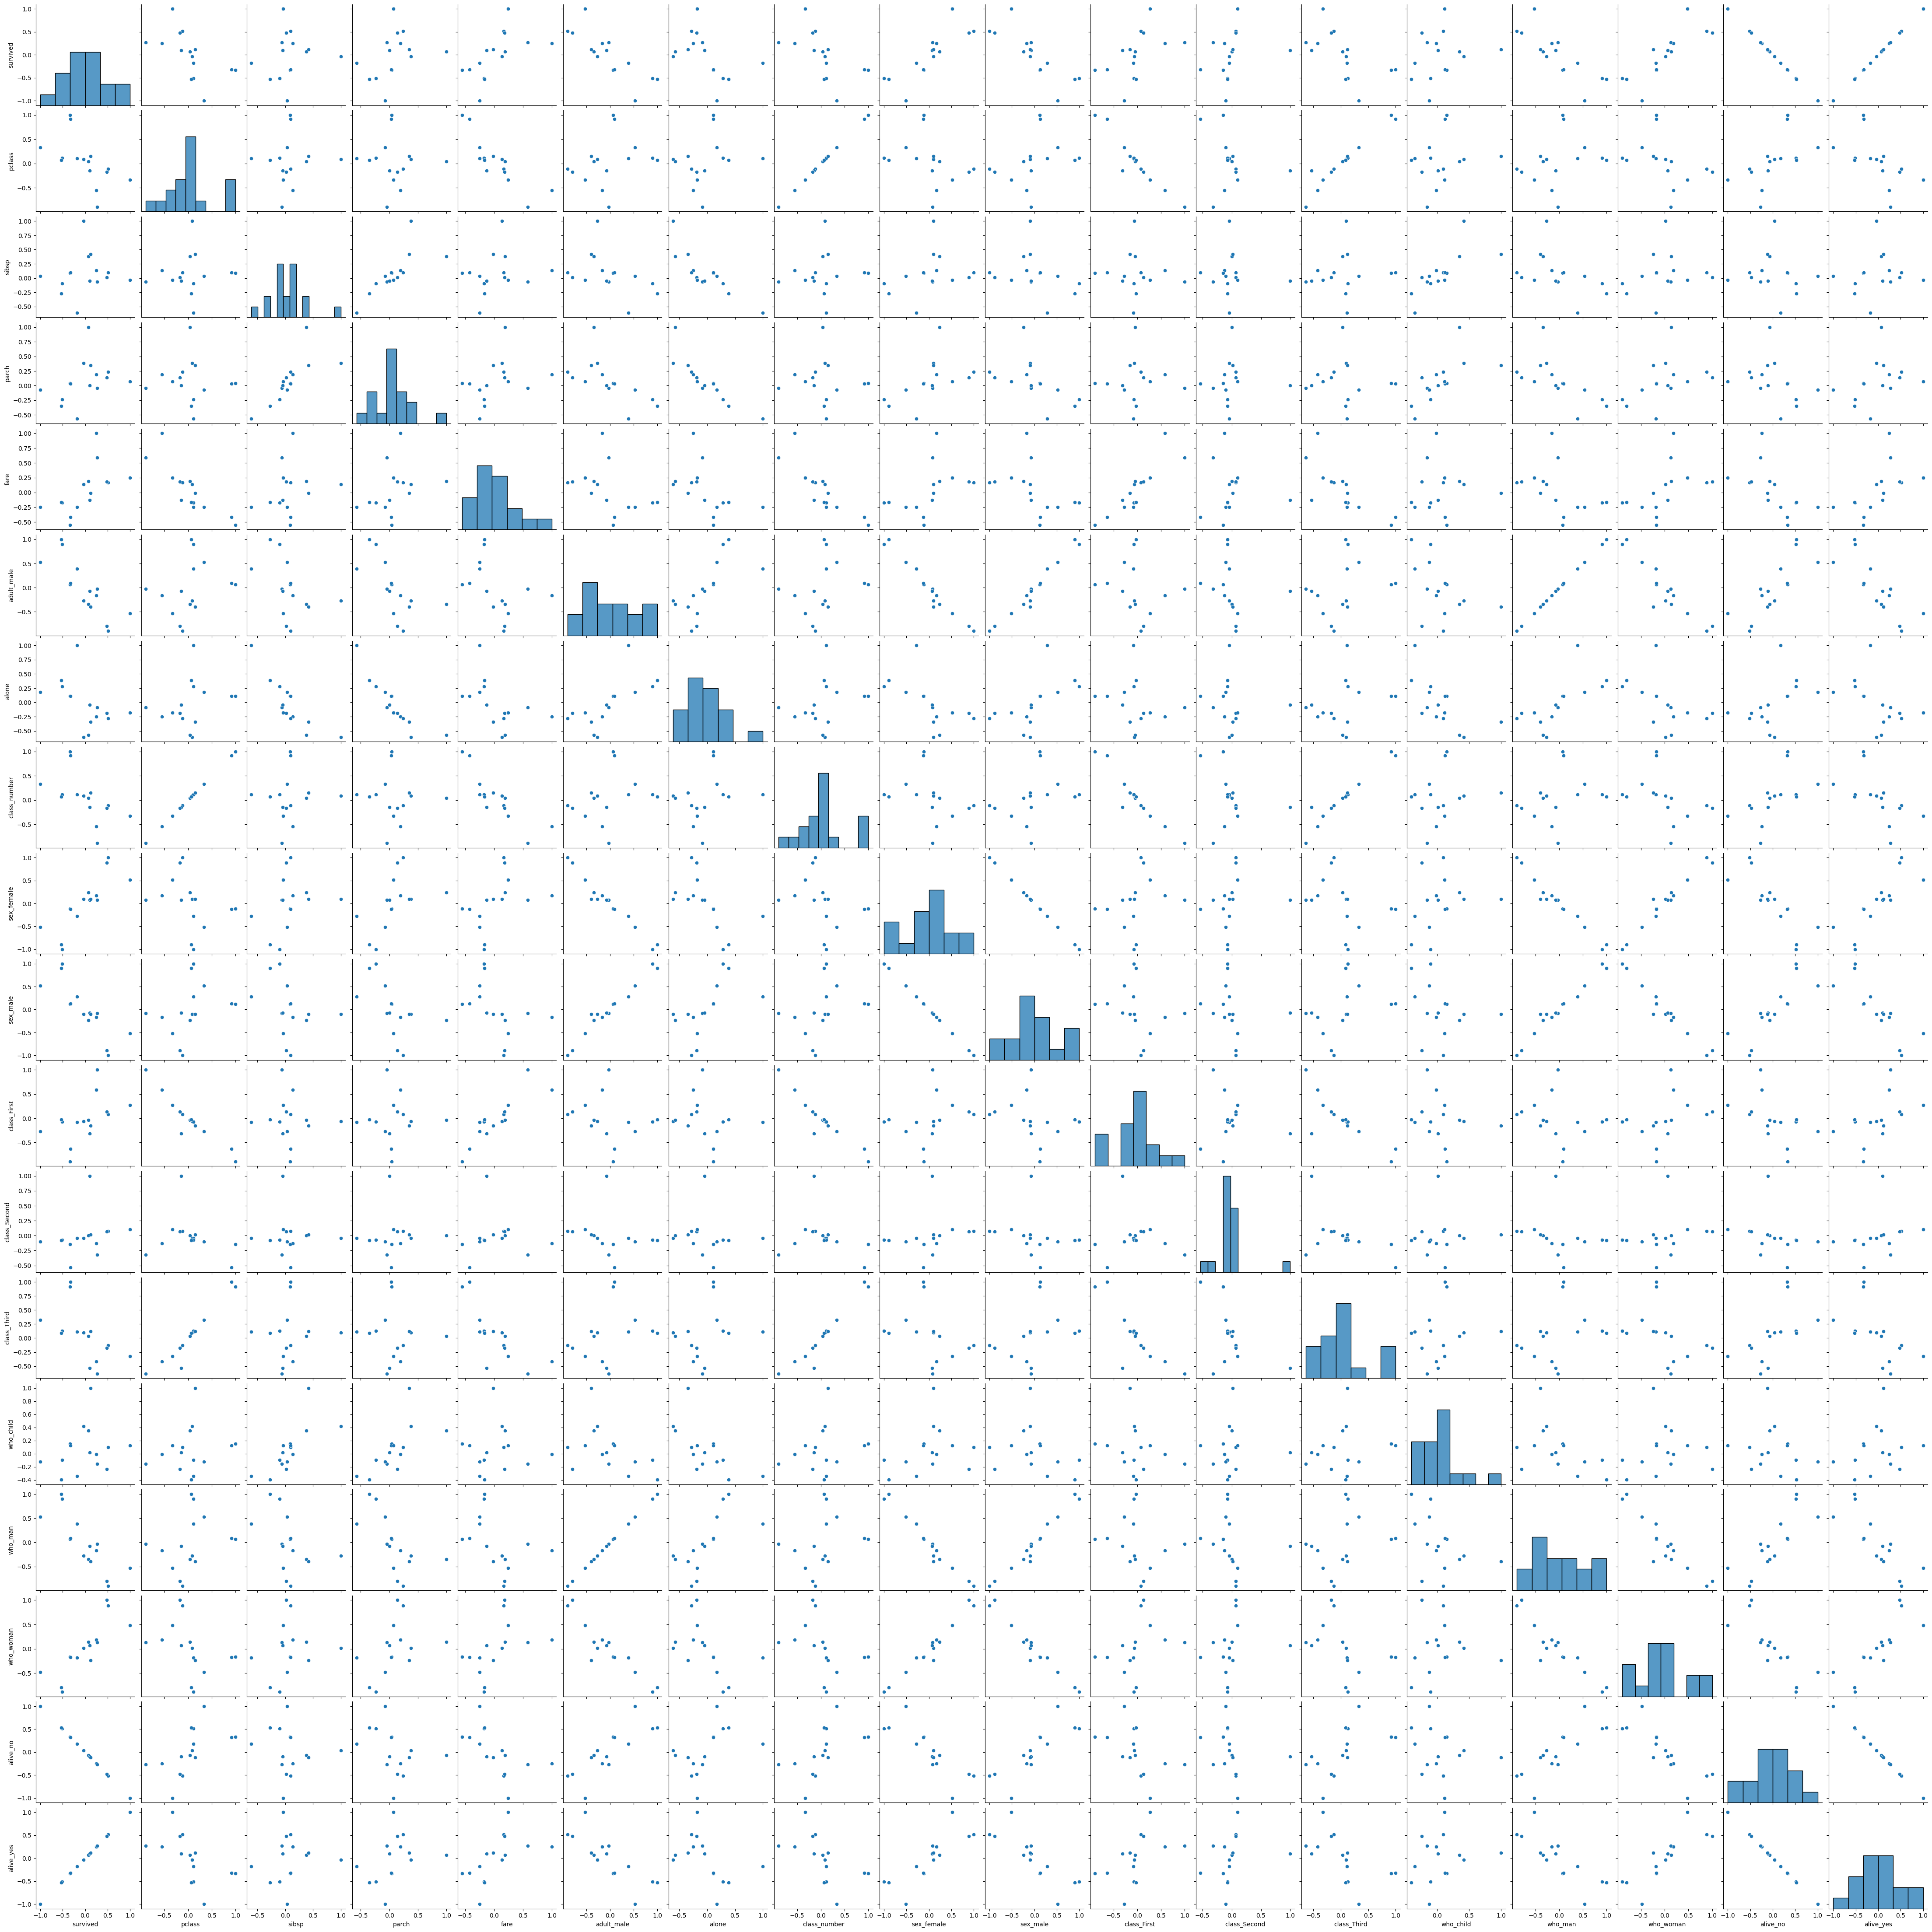

In [287]:
sns.pairplot(data=pd.get_dummies(titanic).corr())